In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from akita_utils.format_io import h5_to_df

import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import summarize_dot_anchors_data, summarize_average_models_dot_boundary

2024-07-23 10:42:35.672665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 10:42:35.672739: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 10:42:35.673593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 10:42:35.679335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 10:42:36.751806: W tensorflow/compiler/tf2

In [2]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/dot_anchors_windows"

In [3]:
df = summarize_dot_anchors_data(data_dir)

- processing boundary data from model 0
- processing boundary data from model 1
- processing boundary data from model 2
- processing boundary data from model 3
- processing dot data from model 0
- processing dot data from model 1
- processing dot data from model 2
- processing dot data from model 3


In [ ]:
# df

## Correlation between boundary SCD and FDR

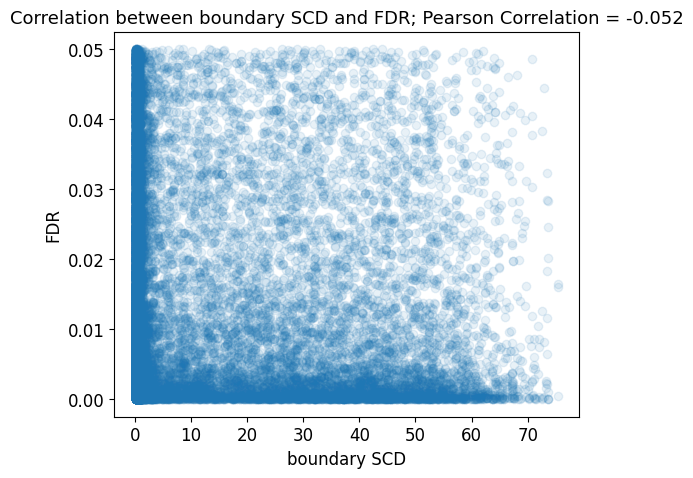

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["FDR"], alpha=0.1)

pearson_corr = stats.pearsonr(df["SCD_B"], df["FDR"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("FDR")

ax.set_title(f"Correlation between boundary SCD and FDR; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

## Correlation between boundary and dot SCD

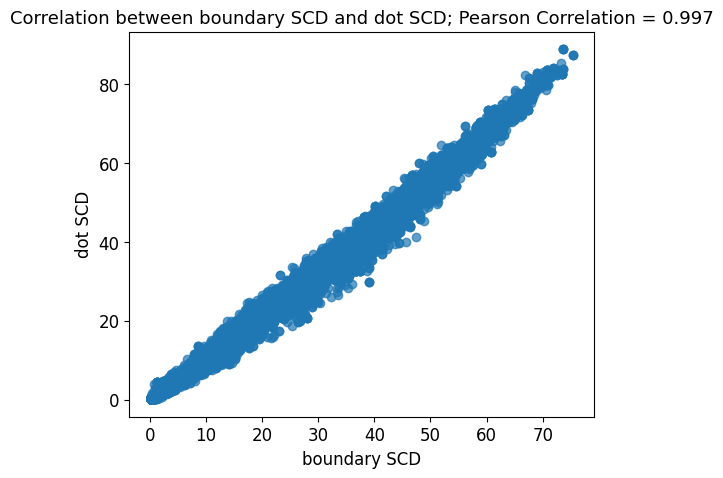

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["SCD_D"], alpha=0.7)

pearson_corr = stats.pearsonr(df["SCD_B"], df["SCD_D"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot SCD")

ax.set_title(f"Correlation between boundary SCD and dot SCD; Pearson Correlation = {rounded_pearson_corr}")

plt.show()

## Boundary SCD vs. cross-score

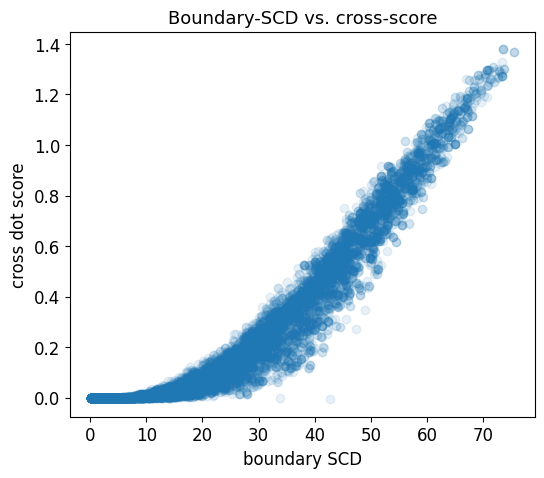

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["cross-score_D"], alpha=0.1)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

plt.show()

## Boundary-SCD vs. dot-score

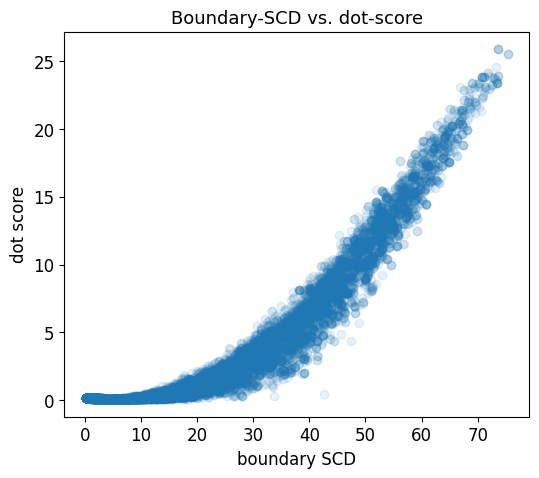

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["dot-score_D"], alpha=0.1)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot score")

ax.set_title("Boundary-SCD vs. dot-score")

plt.show()

## Boundary-SCD vs. x-score

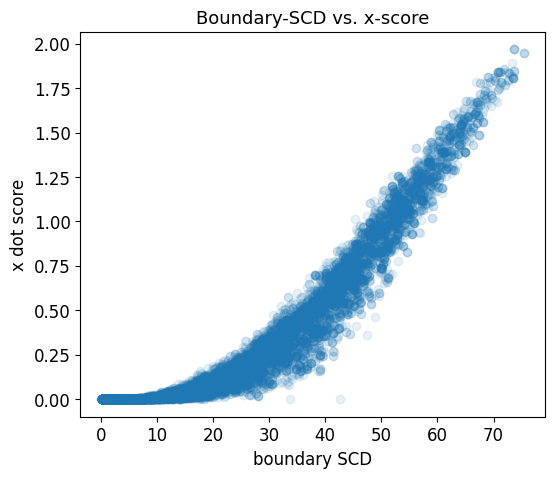

In [8]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["x-score_D"], alpha=0.1)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("x dot score")

ax.set_title("Boundary-SCD vs. x-score")

plt.show()

## Scatterplot with histograms on the margins

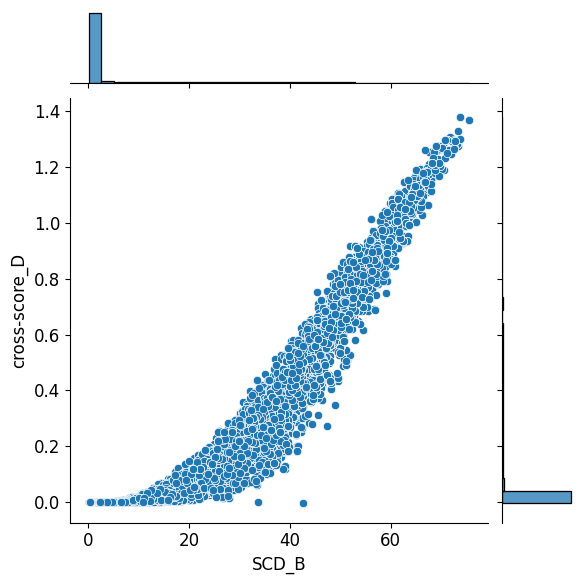

In [9]:
sns.jointplot(
    x=df["SCD_B"], y=df["cross-score_D"], marginal_kws=dict(bins=30, fill=True),
)

## Overlapping scatterplots between boundary and dot windows

In [10]:
boundary_data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"

In [11]:
B_df = summarize_average_models_dot_boundary(boundary_data_dir, 8, ignore_keys=["insertion_SCD", "disruption_SCD"])

Working on MODEL 0
- Processing boundary scores
- Processing dot scores
Working on MODEL 1
- Processing boundary scores
- Processing dot scores
Working on MODEL 2
- Processing boundary scores
- Processing dot scores
Working on MODEL 3
- Processing boundary scores
- Processing dot scores
Working on MODEL 4
- Processing boundary scores
- Processing dot scores
Working on MODEL 5
- Processing boundary scores
- Processing dot scores
Working on MODEL 6
- Processing boundary scores
- Processing dot scores
Working on MODEL 7
- Processing boundary scores
- Processing dot scores


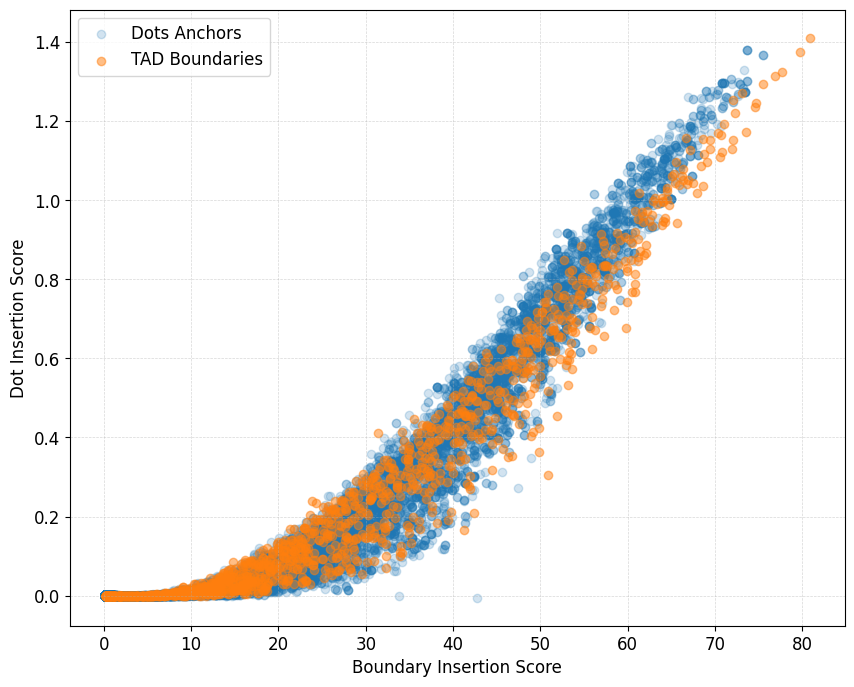

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["cross-score_D"], alpha=0.2, label="Dots Anchors")
scatter = ax.scatter(B_df["SCD_B"], B_df["cross-score"], alpha=0.5, label="TAD Boundaries")

ax.legend()
ax.set_xlabel("Boundary Insertion Score")
ax.set_ylabel("Dot Insertion Score")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# plt.savefig("./plots/TADs_dot_anchors_scatter.pdf", format="pdf", bbox_inches="tight")

plt.show()